# Load Data

In [1]:
import pandas as pd

# Load data utama
df_train = pd.read_csv('mobility_train.csv', parse_dates=['date'])
df_test = pd.read_csv('mobility_test.csv', parse_dates=['date'])

# Tambahkan kolom untuk identifikasi data train/test
df_train['is_train'] = 1
df_test['is_train'] = 0
df_test['trips_thousands'] = None  # Placeholder target

# Gabungkan train dan test untuk preprocessing seragam
df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_all.drop(columns=['ID'], inplace=True)

df_all.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_18832\1176541211.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)


,zone_id,date,trips_thousands,is_train
0,Z029,2025-02-24,291.223641,1
1,Z084,2025-01-27,295.244786,1
2,Z103,2025-01-31,312.233743,1
3,Z061,2025-02-26,296.010680,1
4,Z009,2025-01-17,262.210143,1


In [2]:
df_all.dtypes

zone_id                    object
date               datetime64[ns]
trips_thousands           float64
is_train                    int64
dtype: object

# Explonatory Data Analysis

## Merge All Data Frame

### Merge Aktivitas Urban

In [3]:
bisnis = pd.read_csv('Aktivitas_Urban/business_activity.csv')
event = pd.read_csv('Aktivitas_Urban/event_data.csv')
turis = pd.read_csv('Aktivitas_Urban/tourism_data.csv')
traffic = pd.read_csv('Aktivitas_Urban/traffic_data.csv')

list = [bisnis, event, turis, traffic]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 4)
zone_id              object
date                 object
business_density    float64
retail_count        float64
dtype: object
(18000, 4)
zone_id         object
date            object
event_count    float64
event_type      object
dtype: object
(18000, 3)
zone_id            object
date               object
tourist_visits    float64
dtype: object
(18000, 3)
zone_id               object
date                  object
traffic_congestion    object
dtype: object


In [4]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [5]:
dataframes = [
    ("bisnis", bisnis),
    ("event", event),
    ("turis", turis),
    ("traffic", traffic)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


bisnis: datetime64[ns]
event: datetime64[ns]
turis: datetime64[ns]
traffic: datetime64[ns]


In [6]:
# Mulai dari df_all
df_merged = df_all.copy()

# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L


In [7]:
df_merged.nunique()

zone_id                 200
date                     90
trips_thousands       10000
is_train                  2
business_density      11186
retail_count            180
event_count              10
event_type                3
tourist_visits         1000
traffic_congestion        3
dtype: int64

### Merge Cuaca

In [8]:
air = pd.read_csv('Cuaca/air_quality.csv')
weather = pd.read_csv('Cuaca/weather_conditions.csv')

list = [air, weather]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
air_quality_index    float64
dtype: object
(18000, 4)
zone_id           object
date              object
temperature      float64
precipitation    float64
dtype: object


In [9]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [10]:
dataframes = [
    ("air_quality", air),
    ("weather_conditions", weather)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


air_quality: datetime64[ns]
weather_conditions: datetime64[ns]


In [11]:
# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883


### Merge Demografi

Demografi tidak punya date, hanya punya zone_id

In [12]:
edukasi = pd.read_csv('Demografi/education_data.csv')
resident = pd.read_csv('Demografi/resident_data.csv')
workforce = pd.read_csv('Demografi/workforce_data.csv')

demografi = [edukasi, resident, workforce]

for i in demografi:
        df_merged = df_merged.merge(i, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation,education_level,school_count,resident_count,age_group,employment_rate,commute_preference,workforce_size
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN,3.299118,49.0,26396.0,Y,0.842074,B,29489.0
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688,4.640539,44.0,63573.0,A,0.768560,B,32213.0
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451,4.558608,NaN,75591.0,Y,0.624985,B,30766.0
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613,2.284324,12.0,NaN,S,0.785476,B,36910.0
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883,2.789873,40.0,26265.0,Y,0.628162,B,32117.0


### Merge Infrastruktur_Transportasi

In [13]:
bike = pd.read_csv('Infrastruktur_Transportasi/bike_sharing.csv')
parking = pd.read_csv('Infrastruktur_Transportasi/parking_data.csv')
road = pd.read_csv('Infrastruktur_Transportasi/road_network.csv')
transit = pd.read_csv('Infrastruktur_Transportasi/transit_stations.csv')

list = [bike, parking, road, transit]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
bike_availability    float64
dtype: object
(18000, 3)
zone_id              object
date                 object
parking_capacity    float64
dtype: object
(200, 2)
zone_id          object
road_density    float64
dtype: object
(200, 3)
zone_id           object
station_count    float64
transit_type      object
dtype: object


bike_sharing dan parking_data punya zone_id dan date, tapi road_network dan transit_stations hanya punya zone_id

In [14]:
bike['date'] = pd.to_datetime(bike['date'])
parking['date'] = pd.to_datetime(parking['date'])


In [15]:
df_merged = df_merged.merge(bike, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(parking, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(road, on = 'zone_id', how = 'left')
df_merged = df_merged.merge(transit, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,...,resident_count,age_group,employment_rate,commute_preference,workforce_size,bike_availability,parking_capacity,road_density,station_count,transit_type
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,...,26396.0,Y,0.842074,B,29489.0,117.0,316.0,76.884185,10.0,B
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,...,63573.0,A,0.768560,B,32213.0,29.0,303.0,61.890157,8.0,T
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,...,75591.0,Y,0.624985,B,30766.0,84.0,931.0,29.140185,10.0,B
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,...,NaN,S,0.785476,B,36910.0,188.0,455.0,24.544626,9.0,T
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,...,26265.0,Y,0.628162,B,32117.0,67.0,325.0,55.534511,11.0,T


## Distribusi Data

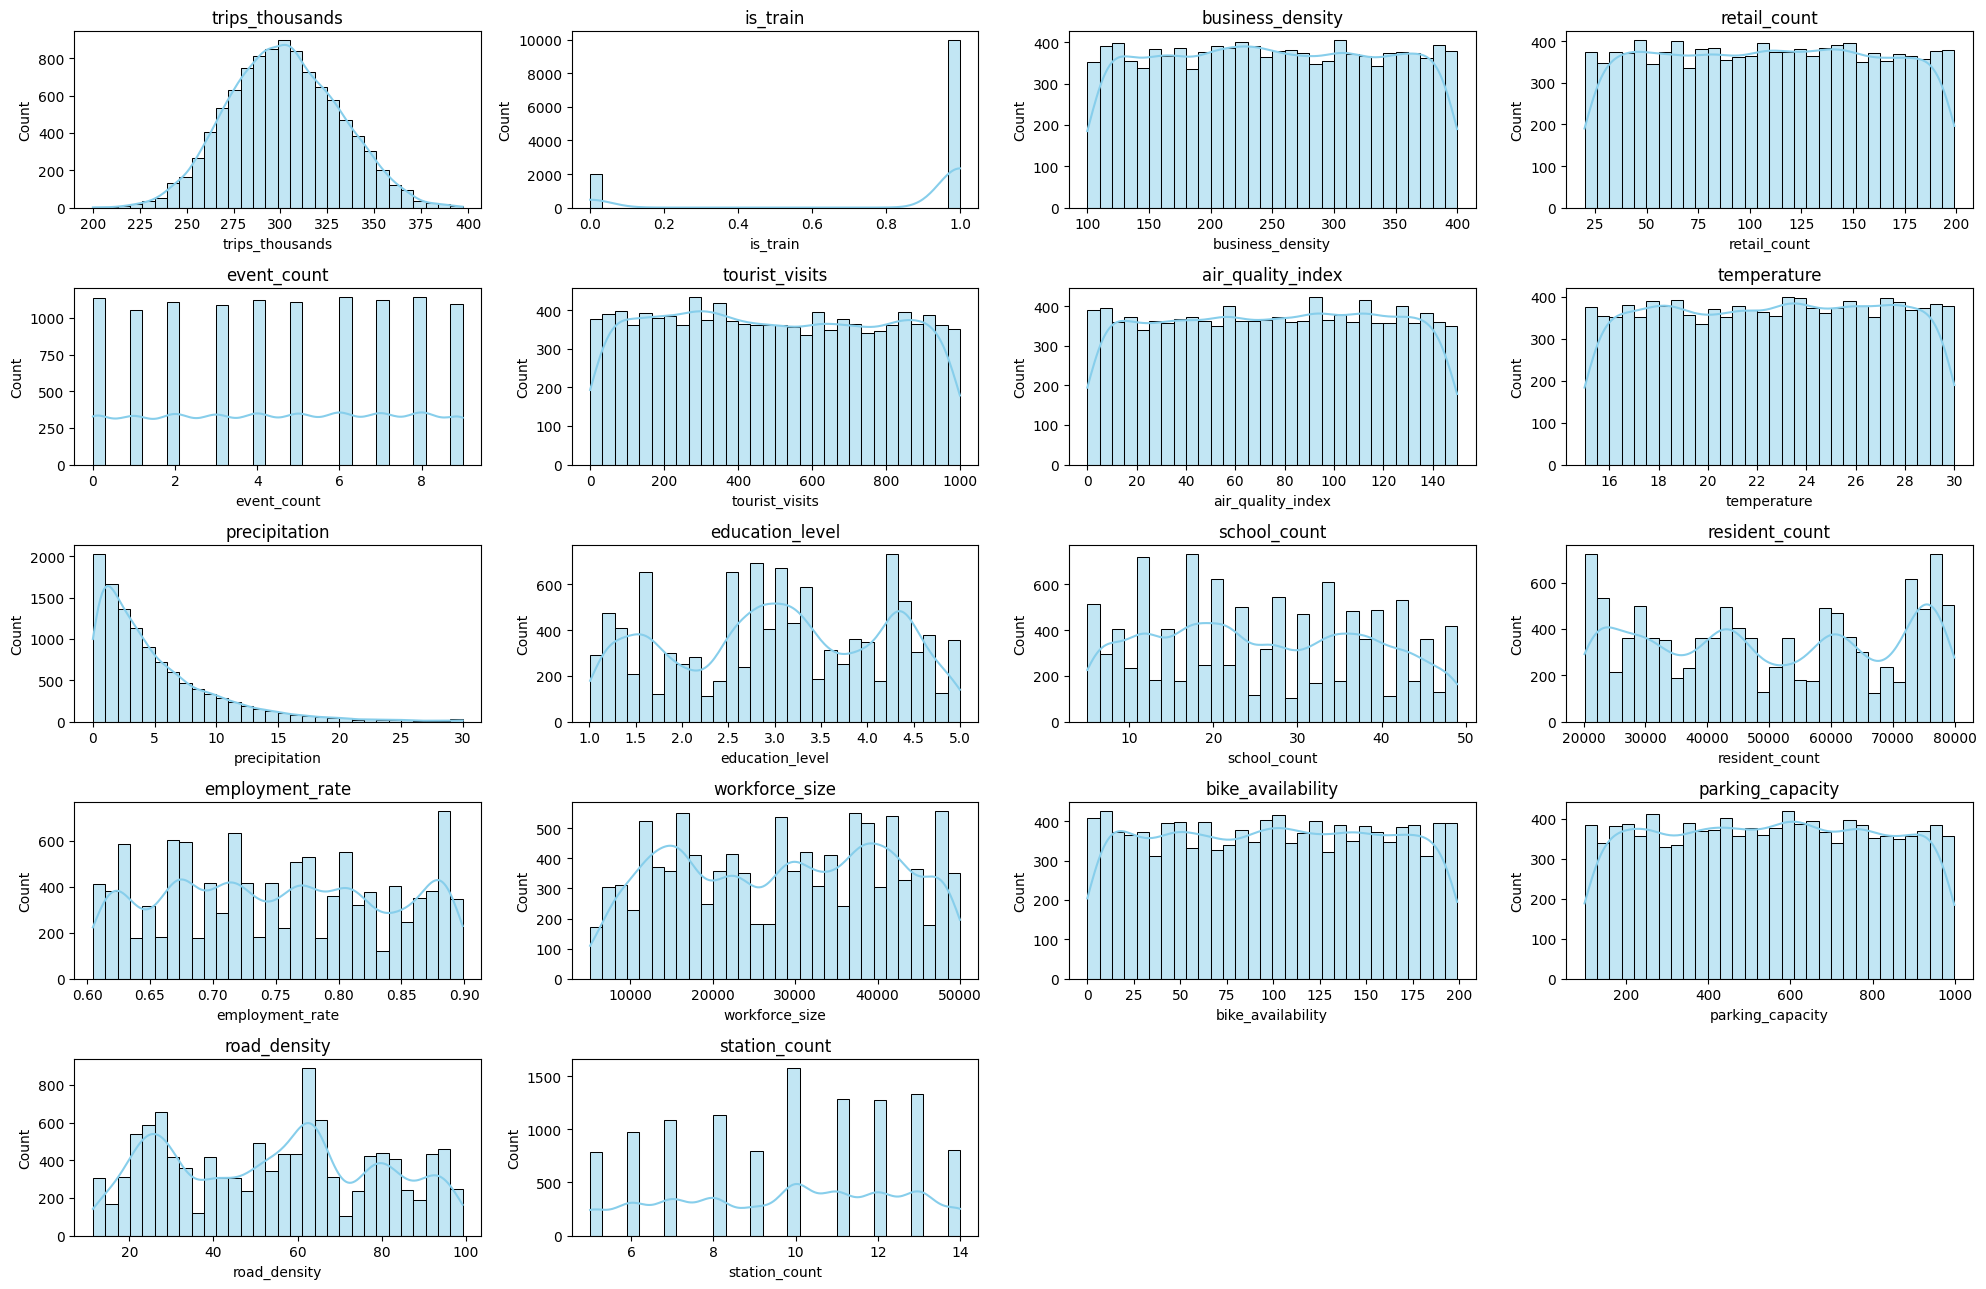

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Deteksi kolom numerik otomatis
num_cols = df_merged.select_dtypes(include='number').columns.tolist()

# Plot histogram
plt.figure(figsize=(20, len(num_cols) * 3 // 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, i)
    sns.histplot(df_merged[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Missing and Duplicate Data

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   zone_id             12000 non-null  object        
 1   date                12000 non-null  datetime64[ns]
 2   trips_thousands     10000 non-null  float64       
 3   is_train            12000 non-null  int64         
 4   business_density    11186 non-null  float64       
 5   retail_count        11158 non-null  float64       
 6   event_count         11132 non-null  float64       
 7   event_type          11166 non-null  object        
 8   tourist_visits      11188 non-null  float64       
 9   traffic_congestion  11105 non-null  object        
 10  air_quality_index   11127 non-null  float64       
 11  temperature         11161 non-null  float64       
 12  precipitation       11159 non-null  float64       
 13  education_level     11023 non-null  float64   

In [18]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
school_count          1149
age_group             1089
workforce_size        1048
resident_count         994
education_level        977
station_count          952
commute_preference     911
traffic_congestion     895
air_quality_index      873
event_count            868
parking_capacity       849
retail_count           842
precipitation          841
temperature            839
bike_availability      839
event_type             834
business_density       814
tourist_visits         812
transit_type           767
employment_rate        601
road_density           594
date                     0
zone_id                  0
is_train                 0
dtype: int64


trips_thousands itu dibiarkan null, karena target class. Kalau diisi, nanti mengganggu distribusi data

In [19]:
# 1. Pisahkan dulu fitur numerik selain target
numerical_cols = df_merged.select_dtypes(include=['number']).columns.drop('trips_thousands')

# 2. Isi missing value hanya untuk kolom numerik (kecuali target)
df_merged[numerical_cols] = df_merged[numerical_cols].fillna(df_merged[numerical_cols].median())

In [20]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
age_group             1089
commute_preference     911
traffic_congestion     895
event_type             834
transit_type           767
zone_id                  0
is_train                 0
date                     0
tourist_visits           0
event_count              0
retail_count             0
business_density         0
precipitation            0
education_level          0
temperature              0
air_quality_index        0
resident_count           0
school_count             0
workforce_size           0
employment_rate          0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
dtype: int64


In [21]:
# Pilih kolom kategorikal (object atau kategori)
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns

# Isi missing value dengan modus
for col in categorical_cols:
    if df_merged[col].isna().any():
        mode_value = df_merged[col].mode()[0]
        df_merged[col] = df_merged[col].fillna(mode_value)

print(df_merged.isna().sum().sort_values(ascending=False))


trips_thousands       2000
zone_id                  0
date                     0
is_train                 0
business_density         0
retail_count             0
event_count              0
event_type               0
tourist_visits           0
traffic_congestion       0
air_quality_index        0
temperature              0
precipitation            0
education_level          0
school_count             0
resident_count           0
age_group                0
employment_rate          0
commute_preference       0
workforce_size           0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
transit_type             0
dtype: int64


In [22]:
df_merged.duplicated().sum()

np.int64(0)

## Encoding

In [23]:
object_cols = df_merged.select_dtypes(include='object').columns

# Tampilkan unique values per kolom
for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())



🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

standard_values = {
    'age_group': ['Young', 'Adult', 'Senior'],
    'commute_preference': ['Bus', 'Train'],
    'event_type': ['Cultural', 'Sports', 'None'],
    'traffic_congestion': ['Low', 'Medium', 'High'],
    'transit_type': ['Bus', 'Train', 'Mixed']
}

<Axes: title={'center': 'Rata-rata trips per zone'}, xlabel='zone_id'>

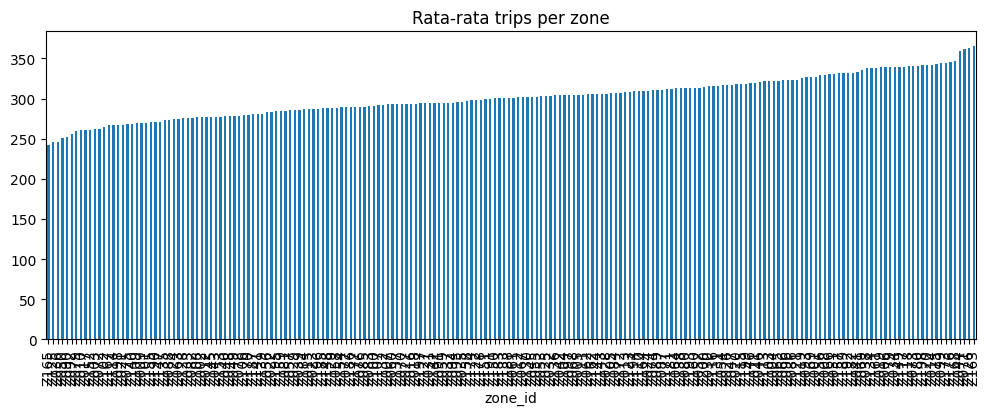

In [24]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values()
zone_mean.plot(kind='bar', figsize=(12, 4), title='Rata-rata trips per zone')

In [25]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values(ascending=False)

print(zone_mean)

zone_id
Z163    365.342880
Z126    363.241272
Z071    361.954133
Z044    359.149613
Z168    346.274665
           ...    
Z090    252.362323
Z050    251.508476
Z036    245.544960
Z125    245.419417
Z165    241.576508
Name: trips_thousands, Length: 200, dtype: float64


In [26]:
print(zone_mean.nunique(), df_merged['zone_id'].nunique())

200 200


In [27]:
# Standardize capitalization
df_merged['age_group'] = df_merged['age_group'].str.upper()
df_merged['commute_preference'] = df_merged['commute_preference'].str.upper()
df_merged['transit_type'] = df_merged['transit_type'].str.upper()

for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())


🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

In [28]:
ordinal_maps = {
    'age_group': {'Y': 0, 'A': 1, 'S': 2, 'a': 1, 's': 2},
    'traffic_congestion': {'L': 0, 'M': 1, 'H': 2}
}
df_merged.replace(ordinal_maps, inplace=True)

df_merged = pd.get_dummies(df_merged, columns=['event_type', 'commute_preference', 'transit_type'])

C:\Users\User\AppData\Local\Temp\ipykernel_18832\2493089103.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace(ordinal_maps, inplace=True)


In [29]:
# Mapping dari zone_id ke zone_mean
zone_mean_map = zone_mean.to_dict()

# Buat kolom baru di df_merged
df_merged['zone_mean'] = df_merged['zone_id'].map(zone_mean_map)

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,tourist_visits,traffic_congestion,air_quality_index,...,station_count,event_type_C,event_type_N,event_type_S,commute_preference_B,commute_preference_T,transit_type_B,transit_type_M,transit_type_T,zone_mean
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,858.0,0,127.735031,...,10.0,False,True,False,True,False,True,False,False,286.126812
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,319.0,1,46.175101,...,8.0,False,True,False,True,False,False,False,True,307.282911
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,375.0,1,30.457095,...,10.0,False,True,False,True,False,True,False,False,321.654426
3,Z061,2025-02-26,296.010680,1,249.451003,107.0,8.0,797.0,0,118.442864,...,9.0,False,True,False,True,False,False,False,True,301.264703
4,Z009,2025-01-17,262.210143,1,135.967328,110.0,7.0,149.0,0,2.988478,...,11.0,False,True,False,True,False,False,False,True,269.668344


## Outlier

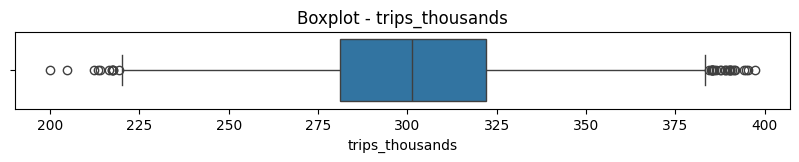

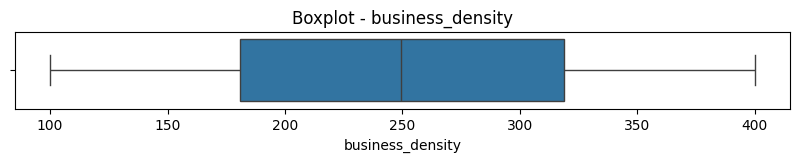

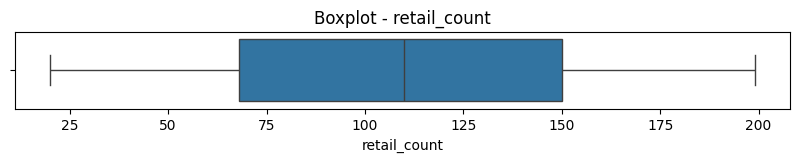

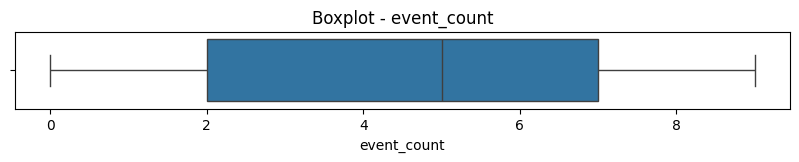

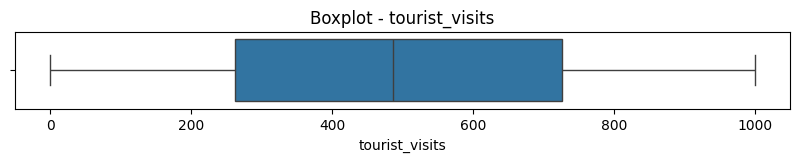

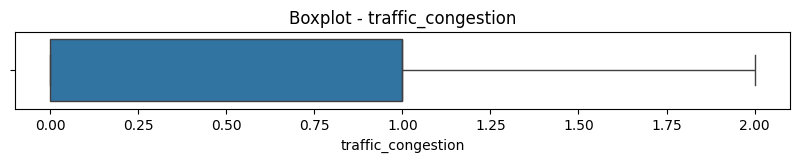

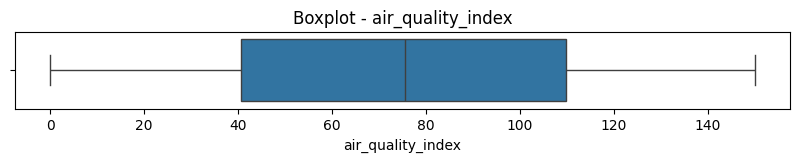

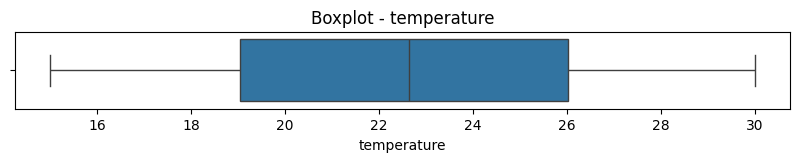

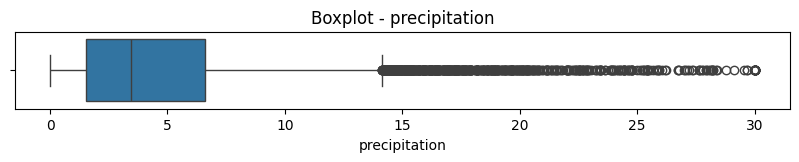

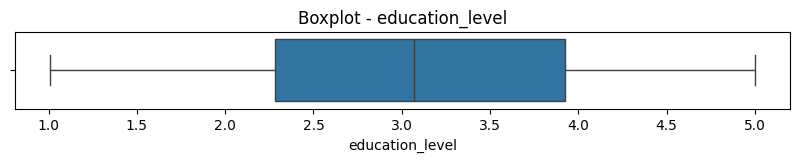

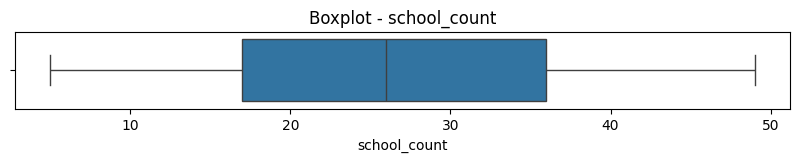

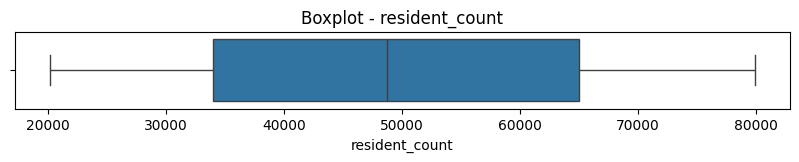

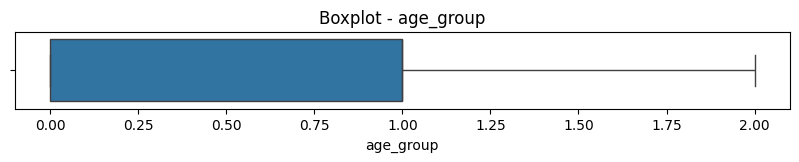

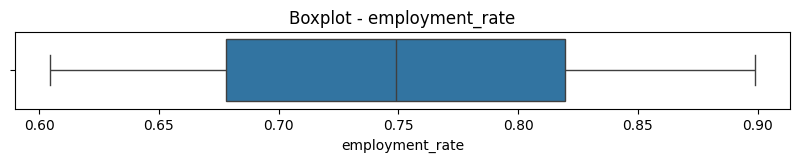

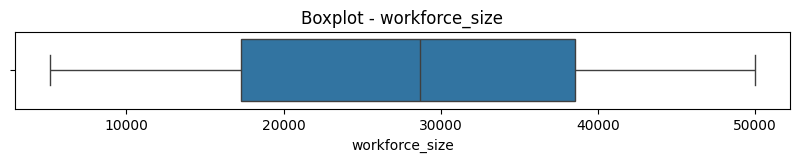

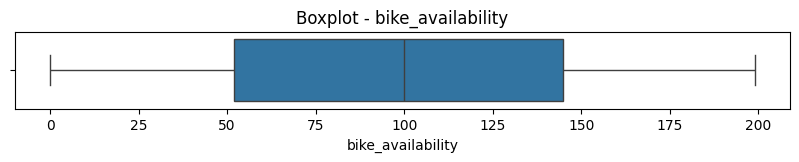

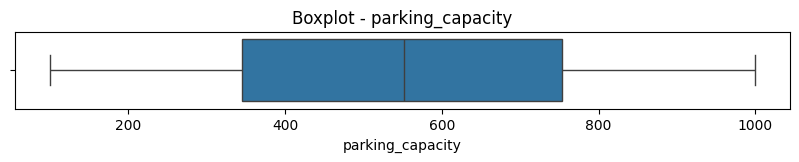

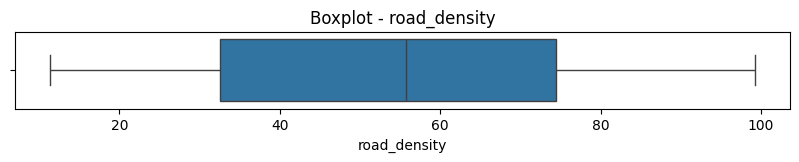

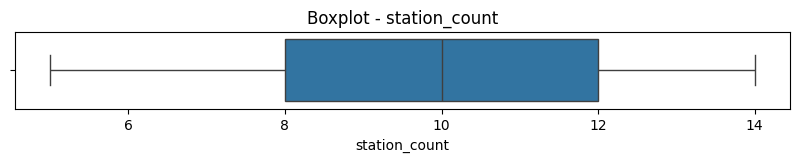

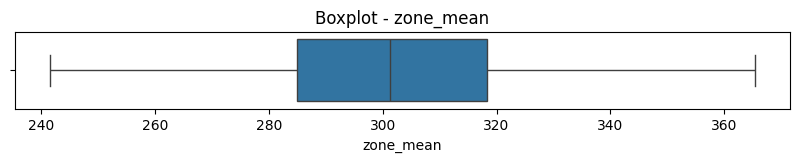

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns.drop('is_train')

for col in numerical_cols:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df_merged, x=col)
    plt.title(f'Boxplot - {col}')
    plt.show()


In [31]:
# Statistik IQR untuk deteksi outlier
def check_outlier_stats(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

for col in numerical_cols:
    check_outlier_stats(df_merged, col)


trips_thousands: 36 outliers
business_density: 0 outliers
retail_count: 0 outliers
event_count: 0 outliers
tourist_visits: 0 outliers
traffic_congestion: 0 outliers
air_quality_index: 0 outliers
temperature: 0 outliers
precipitation: 673 outliers
education_level: 0 outliers
school_count: 0 outliers
resident_count: 0 outliers
age_group: 0 outliers
employment_rate: 0 outliers
workforce_size: 0 outliers
bike_availability: 0 outliers
parking_capacity: 0 outliers
road_density: 0 outliers
station_count: 0 outliers
zone_mean: 0 outliers


### Precipitation

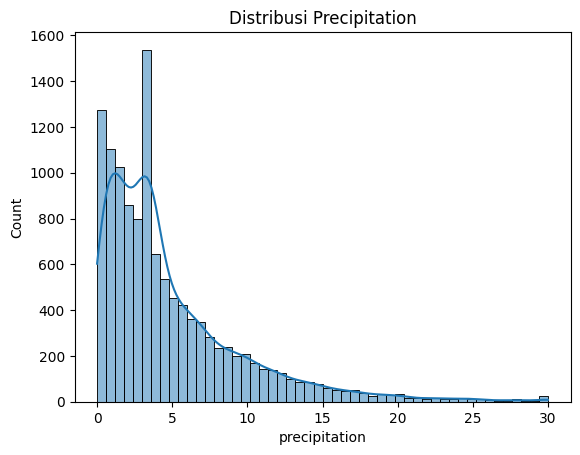

In [32]:
# Cek distribusi precipitation
import numpy as np
sns.histplot(df_merged['precipitation'], bins=50, kde=True)
plt.title("Distribusi Precipitation")
plt.show()


In [33]:
# STEP 1: Salin data mentah (SEBELUM clipping apapun!)
before_clip = df_merged['precipitation'].copy()

# STEP 2: Hitung batas bawah & atas dari data mentah
q_low = before_clip.quantile(0.01)
q_high = before_clip.quantile(0.99)

# STEP 3: Clipping (Winsorize) dari data mentah
df_merged['precipitation'] = before_clip.clip(q_low, q_high)

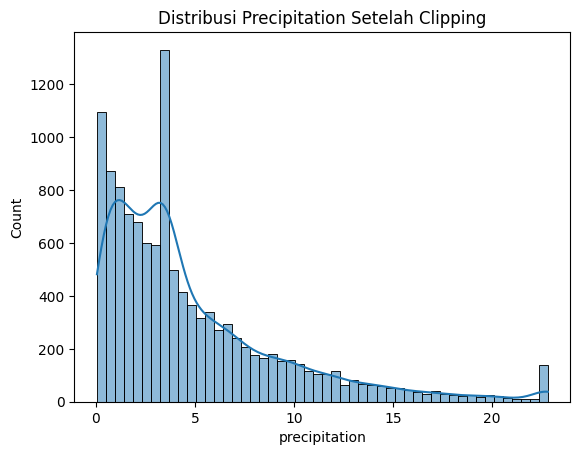

In [34]:
# STEP 4: Cek distribusi setelah clipping
sns.histplot(df_merged['precipitation'], bins=50, kde=True)
plt.title("Distribusi Precipitation Setelah Clipping")
plt.show()

In [35]:
# 5. Validasi hasil clipping
print("Jumlah outlier sebelum clipping:", (before_clip > q_high).sum())
print("Jumlah outlier sesudah clipping:", (df_merged['precipitation'] > q_high).sum())
print("Nilai maksimum sekarang:", df_merged['precipitation'].max())

Jumlah outlier sebelum clipping: 120
Jumlah outlier sesudah clipping: 0
Nilai maksimum sekarang: 22.812521822732737


### Trips Thousands

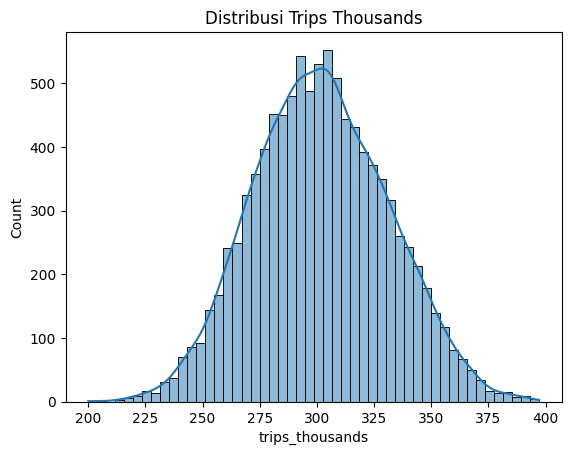

In [36]:
# Cek distribusi trips_thousands
import numpy as np
sns.histplot(df_merged['trips_thousands'], bins=50, kde=True)
plt.title("Distribusi Trips Thousands")
plt.show()

## Correlation

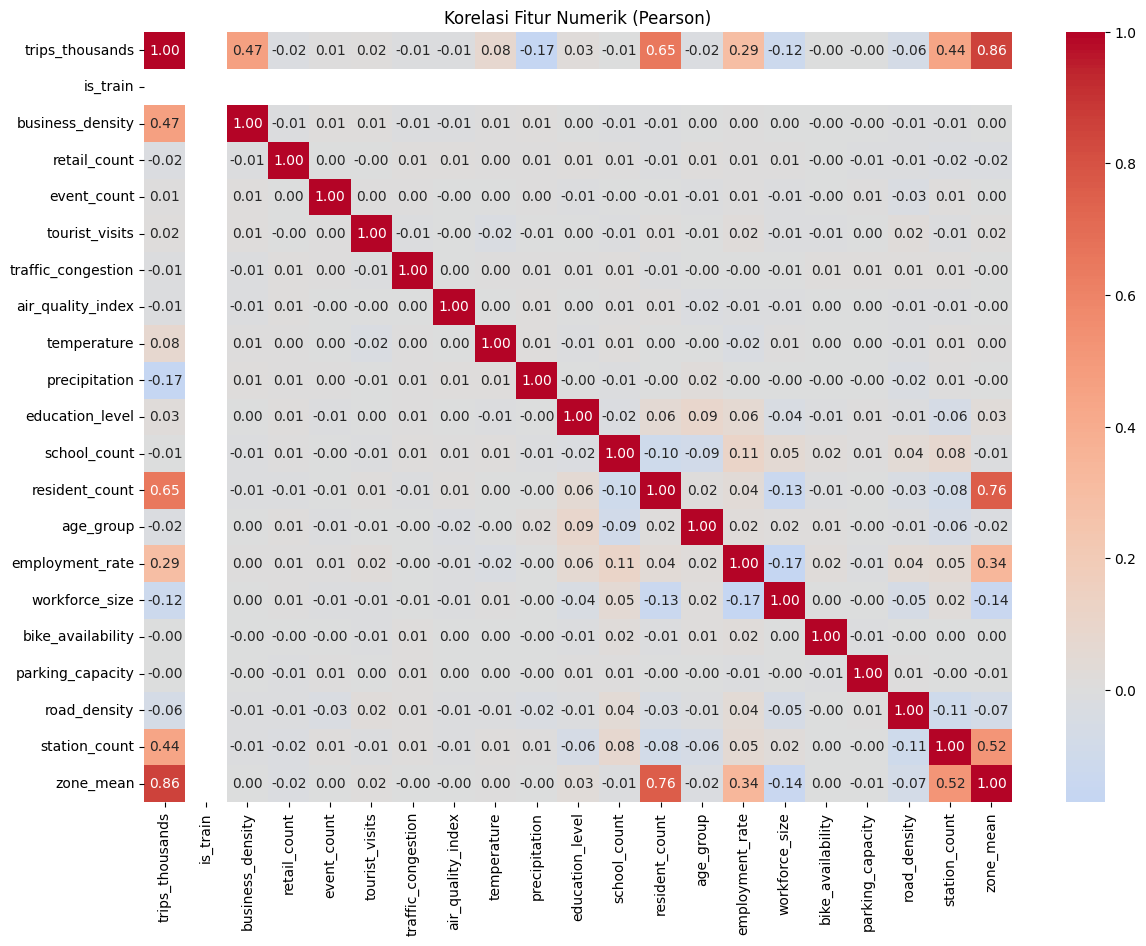

In [37]:
# Ambil hanya data latih (tanpa NaN di target)
df_train_only = df_merged[df_merged['is_train'] == 1].copy()

# Pilih kolom numerik
numerical_cols = df_train_only.select_dtypes(include='number').columns

# Hitung korelasi Pearson
corr_matrix = df_train_only[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik (Pearson)")
plt.show()


In [38]:
# Korelasi hanya terhadap target
target_corr = corr_matrix['trips_thousands'].sort_values(ascending=False)
print("Korelasi fitur terhadap trips_thousands:")
print(target_corr)


Korelasi fitur terhadap trips_thousands:
trips_thousands       1.000000
zone_mean             0.857663
resident_count        0.651651
business_density      0.465014
station_count         0.443770
employment_rate       0.294374
temperature           0.079426
education_level       0.025483
tourist_visits        0.016456
event_count           0.007780
bike_availability    -0.002879
parking_capacity     -0.004405
school_count         -0.005616
traffic_congestion   -0.006620
air_quality_index    -0.007123
age_group            -0.015503
retail_count         -0.019344
road_density         -0.063550
workforce_size       -0.119147
precipitation        -0.170321
is_train                   NaN
Name: trips_thousands, dtype: float64


# Model Building

In [39]:
df_train = df_merged[df_merged['is_train'] == 1].copy()
df_test = df_merged[df_merged['is_train'] == 0].copy()

print(df_train.columns.tolist())

['zone_id', 'date', 'trips_thousands', 'is_train', 'business_density', 'retail_count', 'event_count', 'tourist_visits', 'traffic_congestion', 'air_quality_index', 'temperature', 'precipitation', 'education_level', 'school_count', 'resident_count', 'age_group', 'employment_rate', 'workforce_size', 'bike_availability', 'parking_capacity', 'road_density', 'station_count', 'event_type_C', 'event_type_N', 'event_type_S', 'commute_preference_B', 'commute_preference_T', 'transit_type_B', 'transit_type_M', 'transit_type_T', 'zone_mean']


In [40]:
drop_cols = ['zone_id', 'zone_mean', 'date', 'is_train', 'trips_thousands'] 
fitur_dipakai = [col for col in df_train.columns if col not in drop_cols]

X = df_train[fitur_dipakai]
y = df_train['trips_thousands']

In [41]:
# Urutkan df_train berdasarkan tanggal
df_train_sorted = df_train.sort_values('date')

# Ambil 80% pertama sebagai training, sisanya sebagai validation
cutoff = int(len(df_train_sorted) * 0.8)
train_data = df_train_sorted.iloc[:cutoff]
val_data   = df_train_sorted.iloc[cutoff:]

X_train = train_data[fitur_dipakai]
y_train = train_data['trips_thousands']

X_val = val_data[fitur_dipakai]
y_val = val_data['trips_thousands']


## Baseline Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Split data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression()
}

# Evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"{name} RMSE: {rmse:.4f}")


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost RMSE: 3.4222
RandomForest RMSE: 4.6362
LinearRegression RMSE: 2.9181


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature Importance

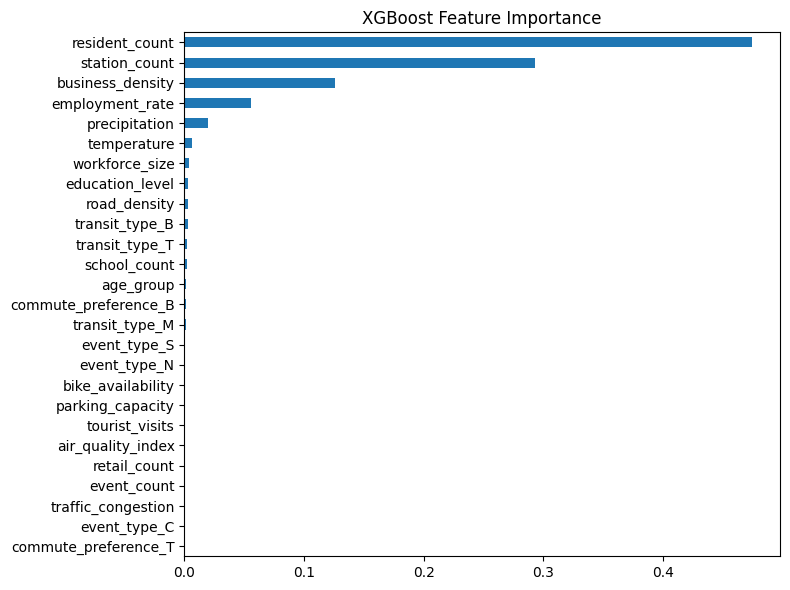

In [43]:
# Feature Importance: XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importance = xgb_importance.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
xgb_importance.plot(kind='barh')
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


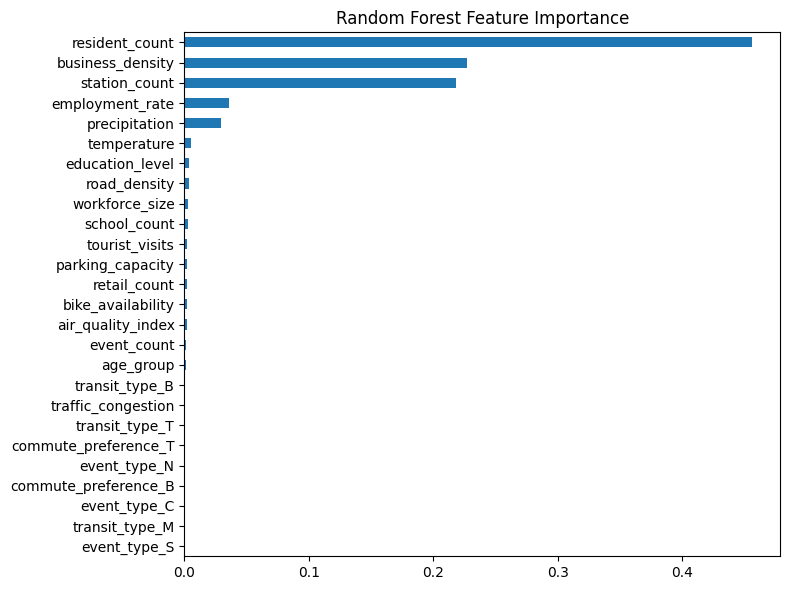

In [44]:
# Feature Importance: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importance = rf_importance.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
rf_importance.plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


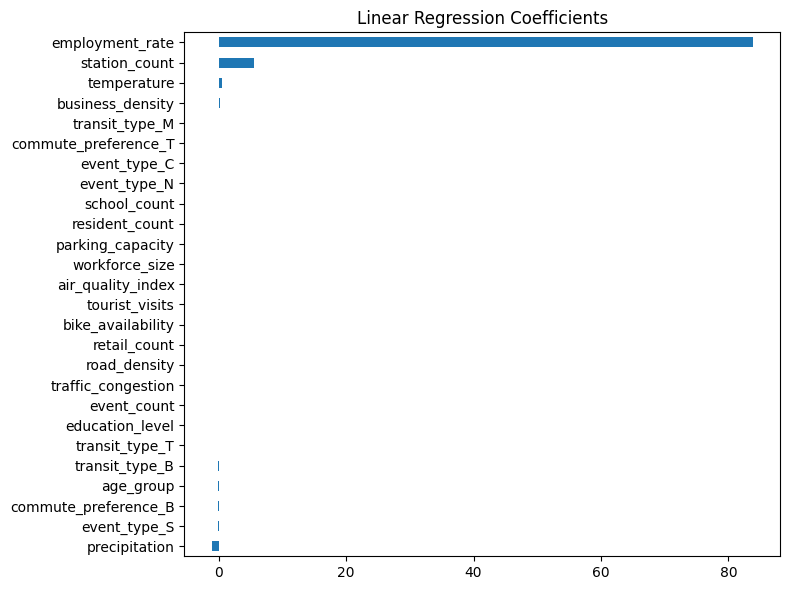

In [45]:
# Feature Importance: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_importance = pd.Series(lr_model.coef_, index=X_train.columns)
lr_importance = lr_importance.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
lr_importance.plot(kind='barh')
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()


## Learning Curve

In [46]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, label, color):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    
    train_rmse = -train_scores.mean(axis=1)
    val_rmse = -val_scores.mean(axis=1)

    plt.plot(train_sizes, train_rmse, label=f"{label} - Train", linestyle='--', color=color)
    plt.plot(train_sizes, val_rmse, label=f"{label} - Validation", linestyle='-', color=color)


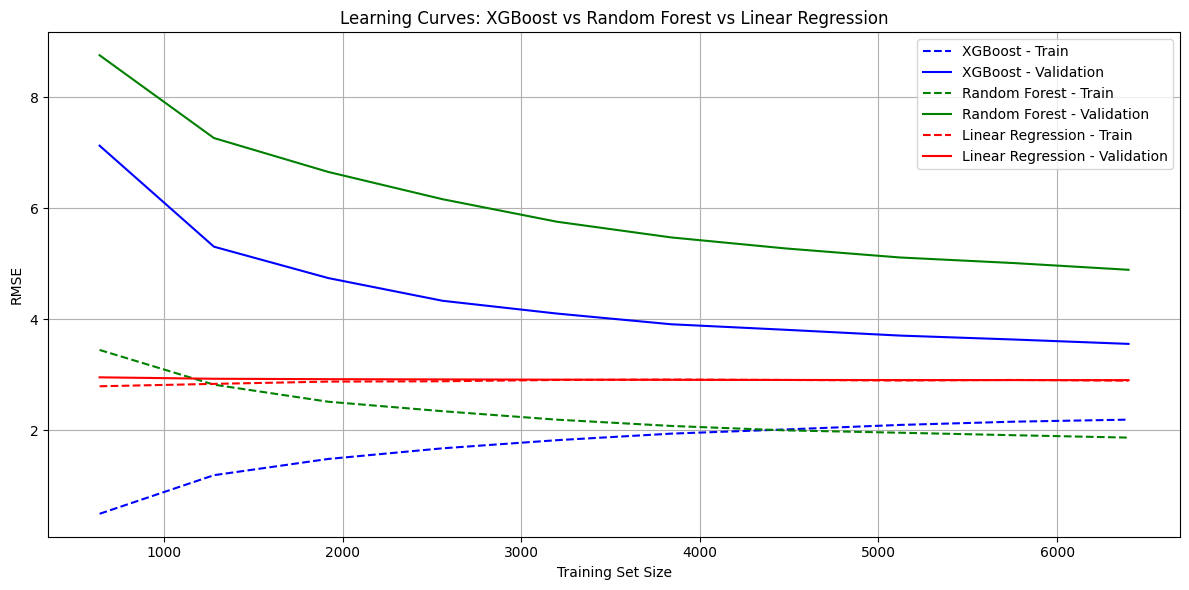

In [47]:
plt.figure(figsize=(12, 6))

plot_learning_curve(
    model=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    X=X_train,
    y=y_train,
    label="XGBoost",
    color="blue"
)

plot_learning_curve(
    model=RandomForestRegressor(n_estimators=100, random_state=42),
    X=X_train,
    y=y_train,
    label="Random Forest",
    color="green"
)

plot_learning_curve(
    model=LinearRegression(),
    X=X_train,
    y=y_train,
    label="Linear Regression",
    color="red"
)

plt.title("Learning Curves: XGBoost vs Random Forest vs Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Re-Train

In [48]:
top8_features = [
    'resident_count',
    'station_count',
    'business_density',
    'employment_rate',
    'precipitation',
    'temperature',
    'road_density',
    'education_level',
#     'workforce_size',
#     'school_count',
#     'tourist_visits'
]

In [ ]:
# Ambil fitur
X_top8 = df_train[top8_features]
y_top8 = df_train['trips_thousands']

# Split
X_train, X_val, y_train, y_val = train_test_split(X_top8, y_top8, test_size=0.2, random_state=42)

# Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train & Evaluate
for name, model in [('XGBoost', xgb_model), ('Random Forest', rf_model)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"{name} RMSE (Top 5 Fitur): {rmse:.4f}")

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost RMSE (Top 5 Fitur): 3.4217
Random Forest RMSE (Top 5 Fitur): 4.2714


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Pastikan df_train diurutkan berdasarkan tanggal
df_train_sorted = df_train.sort_values('date')

# Ambil fitur dan target
X_top8 = df_train_sorted[top8_features]
y_top8 = df_train_sorted['trips_thousands']

# Tentukan batas 80% waktu sebagai training, 20% waktu sebagai validation
split_index = int(len(df_train_sorted) * 0.8)

X_train = X_top8.iloc[:split_index]
y_train = y_top8.iloc[:split_index]
X_val   = X_top8.iloc[split_index:]
y_val   = y_top8.iloc[split_index:]

# Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train & Evaluate
for name, model in [('XGBoost', xgb_model), ('Random Forest', rf_model)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"{name} RMSE (Time-Based, Top 8 Fitur): {rmse:.4f}")


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost RMSE (Time-Based, Top 8 Fitur): 3.3685
Random Forest RMSE (Time-Based, Top 8 Fitur): 4.2270


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 99%|===================| 1987/2000 [01:28<00:00]        

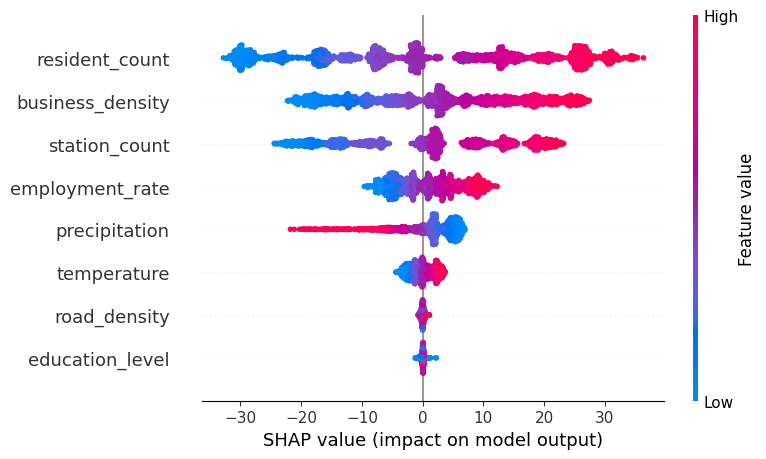

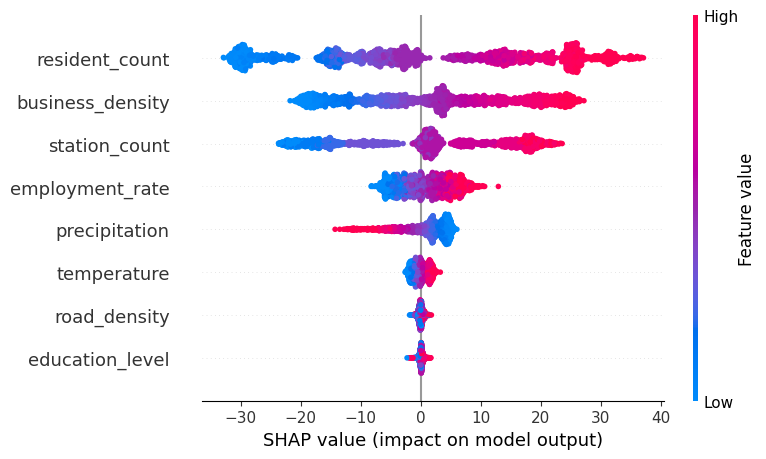

In [49]:
import shap

# Inisialisasi SHAP
explainer_1 = shap.Explainer(xgb_model, X_train)
explainer_2 = shap.Explainer(rf_model, X_train)
shap_values = explainer_1(X_val)
shap_values_2 = explainer_2(X_val)

# Ringkasan kontribusi semua fitur
shap.summary_plot(shap_values, X_val)
shap.summary_plot(shap_values_2, X_val)


In [50]:
from sklearn.model_selection import GridSearchCV

# Tuning XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best RMSE:", -xgb_grid.best_score_)

# Tuning RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 7]
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RMSE:", -rf_grid.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE: 3.2113552650811763
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 4.561421317185201


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid yang lebih komprehensif untuk Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [1.0, 'sqrt'], # '1.0' = semua fitur, 'sqrt' = akar kuadrat dari total fitur
    'max_depth': [10, 20, None], # None = tidak ada batasan kedalaman
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi GridSearchCV untuk RandomForest
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=2 # Dibuat lebih informatif
)

# Jalankan proses tuning
rf_grid.fit(X_train, y_train)

# Cetak hasil terbaik
print("\nBest RandomForest Params:", rf_grid.best_params_)
print("Best Cross-Validated RMSE:", -rf_grid.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best RandomForest Params: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validated RMSE: 4.560184226790383


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 1. Definisikan parameter space
param_dist = {
    "n_estimators": randint(100, 1000),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 10),
    "min_child_weight": randint(1, 10),
    "subsample": uniform(0.5, 0.5),         # 0.5–1.0
    "colsample_bytree": uniform(0.5, 0.5),  # 0.5–1.0
    "gamma": uniform(0, 0.3)
}

# 2. RandomizedSearchCV (belum ada best_params)
xgb_base = XGBRegressor(random_state=42, verbosity=0)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=100,  # Bisa kamu naikkan
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 3. Jalankan search
random_search.fit(X_train, y_train)

# 4. Lihat best parameter dan RMSE
print("✅ Best Params:", random_search.best_params_)
print("✅ Best RMSE (CV):", -random_search.best_score_)

# 5. Gunakan best params + early stopping untuk training final
xgb_first = XGBRegressor(
    **random_search.best_params_,
    early_stopping_rounds=20,
    eval_metric='rmse',
    random_state=42
)

xgb_first.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# 6. Evaluasi di validation
y_pred = xgb_first.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("📉 Final Validation RMSE:", rmse)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
✅ Best Params: {'colsample_bytree': np.float64(0.8317508845540279), 'gamma': np.float64(0.001518475153865606), 'learning_rate': np.float64(0.04216161028349973), 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 921, 'subsample': np.float64(0.7242120714931237)}
✅ Best RMSE (CV): 3.106971062865456
📉 Final Validation RMSE: 2.9980193621327196


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

# 1. Definisikan parameter space untuk RandomForest
rf_param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10, 100),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": ['sqrt', 'log2', 1.0], # Menggunakan list untuk pilihan kategori
    "bootstrap": [True, False]
}

# 2. Setup RandomizedSearchCV
# Gunakan RandomForestRegressor sebagai estimator
rf_base = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=rf_param_dist,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 3. Jalankan search
random_search_rf.fit(X_train, y_train)

# 4. Lihat best parameter dan RMSE
print("✅ Best RF Params:", random_search_rf.best_params_)
print("✅ Best RF RMSE (CV):", -random_search_rf.best_score_)

# 5. Gunakan best params untuk training final
# RandomForest tidak mendukung early stopping, jadi kita langsung fit dengan parameter terbaik
rf_final = RandomForestRegressor(**random_search_rf.best_params_, random_state=42)

rf_final.fit(X_train, y_train)

# 6. Evaluasi di validation set
y_pred_rf = rf_final.predict(X_val)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
print("📉 Final RF Validation RMSE:", rmse_rf)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
✅ Best RF Params: {'bootstrap': True, 'max_depth': 21, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 267}
✅ Best RF RMSE (CV): 4.563734250023763
📉 Final RF Validation RMSE: 4.221491146813431


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Gunakan RMSE sebagai custom scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Model dasar
xgb_rfe = XGBRegressor(**random_search.best_params_, random_state=42)

# K-Fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Recursive Feature Elimination with Cross Validation
rfecv = RFECV(
    estimator=xgb_rfe,
    step=1,
    cv=cv,
    scoring=rmse_scorer,
    min_features_to_select=3,  # minimal 3 fitur
    n_jobs=-1,
    verbose=1
)

# Jalankan RFE
rfecv.fit(X_train, y_train)

# Hasil
print("✅ Jumlah fitur optimal:", rfecv.n_features_)
# Kalau X_train masih DataFrame
print("✅ Fitur terpilih:", X_train.columns[rfecv.support_].tolist())


# Gunakan model RFE untuk prediksi
y_pred = rfecv.predict(X_val)
final_rmse = mean_squared_error(y_val, y_pred, squared=False)
print("📉 RMSE setelah RFE + CV:", final_rmse)


Fitting estimator with 8 features.
✅ Jumlah fitur optimal: 7
✅ Fitur terpilih: ['resident_count', 'station_count', 'business_density', 'employment_rate', 'precipitation', 'temperature', 'road_density']
📉 RMSE setelah RFE + CV: 3.0013330566398877


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


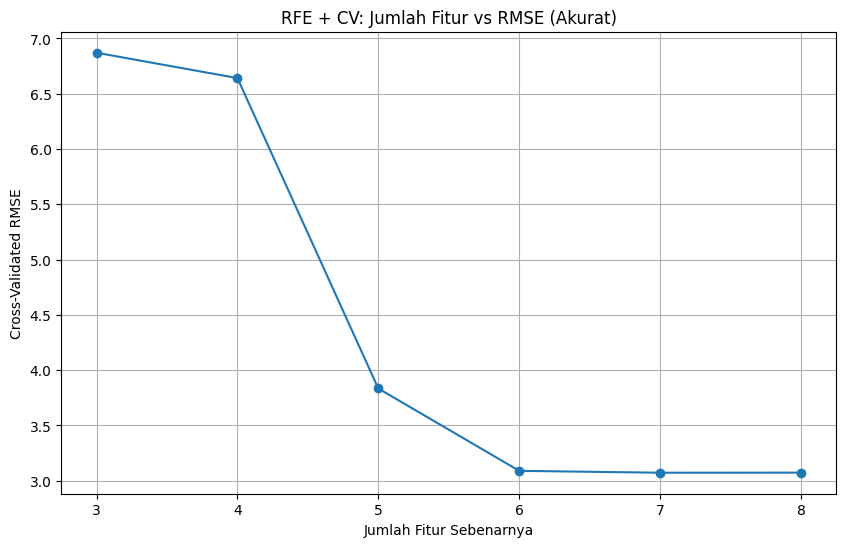

In [55]:
# KODE YANG DIPERBAIKI:

# Atribut yang benar adalah 'min_features_to_select' (tanpa garis bawah di akhir)
min_features = rfecv.min_features_to_select

n_scores = len(rfecv.cv_results_["mean_test_score"])

plt.figure(figsize=(10, 6))
# Gunakan range yang benar untuk sumbu X
plt.plot(range(min_features, min_features + n_scores), 
         -rfecv.cv_results_["mean_test_score"], marker='o')
plt.xlabel("Jumlah Fitur Sebenarnya")
plt.ylabel("Cross-Validated RMSE")
plt.title("RFE + CV: Jumlah Fitur vs RMSE (Akurat)")
plt.grid(True)
plt.show()

In [54]:
best_params = {
    'n_estimators': 921,
    'learning_rate': 0.04216161028349973,
    'max_depth': 4,
    'min_child_weight': 2,
    'subsample': 0.7242120714931237,
    'colsample_bytree': 0.8317508845540279,
    'gamma': 0.001518475153865606
}

# 1. Fitur terpilih hasil RFE
selected_features = [
    'resident_count',
    'station_count',
    'business_density',
    'employment_rate',
    'precipitation',
    'temperature'
]

# 2. Ambil data
X_selected = df_train[selected_features]
y_selected = df_train['trips_thousands']

# 3. Split 80:20
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# 4. Model dengan best hyperparameters dari RandomizedSearchCV
xgb_final = XGBRegressor(
    **best_params,
    random_state=42
)

# 5. Train
xgb_final.fit(X_train, y_train)

# 6. Evaluate
y_pred = xgb_final.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("📊 Final RMSE (RFE + Tuning):", rmse)


📊 Final RMSE (RFE + Tuning): 3.0531806351550865


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
selected_features = ['resident_count', 'station_count', 'business_density', 
                     'employment_rate', 'precipitation', 'temperature', 'road_density']

X = df_train[selected_features]
y = df_train['trips_thousands']

df_sorted = df_train.sort_values('date')  # pastikan urutan waktu
split_index = int(0.8 * len(df_sorted))

X_train = df_sorted[selected_features].iloc[:split_index]
y_train = df_sorted['trips_thousands'].iloc[:split_index]

X_val = df_sorted[selected_features].iloc[split_index:]
y_val = df_sorted['trips_thousands'].iloc[split_index:]


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

best_xgb = XGBRegressor(
    colsample_bytree=0.83175,
    gamma=0.0015,
    learning_rate=0.0421,
    max_depth=4,
    min_child_weight=2,
    n_estimators=921,
    subsample=0.7242,
    random_state=42,
    verbosity=0
)

best_xgb.fit(X_train, y_train)

# Prediksi
log_preds = best_xgb.predict(X_val)
final_preds = log_preds

# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_val, final_preds, squared=False)
print(f"📉 Final RMSE (Retrain with RFE+TimeSplit): {rmse:.4f}")


📉 Final RMSE (Retrain with RFE+TimeSplit): 2.9807


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Definisikan model-model dasar (base models)
# Gunakan parameter terbaik yang sudah Anda temukan
estimators = [
    ('rf', RandomForestRegressor(
        max_depth=10,
        n_estimators=300,
        min_samples_leaf=2,
        random_state=42
    )),
    ('xgb', XGBRegressor(
        max_depth=4,
        n_estimators=600,
        learning_rate=0.05,
        subsample=0.75,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    ))
]

meta_model = Ridge(alpha=3.0)


y_train_log = np.log1p(y_train)

print("y_train asli:", y_train.head().tolist() if hasattr(y_train, 'head') else y_train[:5])
print("y_train_log hasil transformasi:", y_train_log[:5])

# 2. Definisikan meta-model yang sederhana

# 3. Buat model Stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Latih model Stacking seperti model biasa
print("Memulai training model Stacking...")

# PASTIKAN ANDA MENGGUNAKAN y_train_log, BUKAN y_train
stacking_model.fit(X_train, y_train_log)

print("Training selesai.")

# 5. Prediksi dan evaluasi seperti biasa (bagian ini sudah benar)
stacking_preds_log = stacking_model.predict(X_val)
stacking_preds = np.expm1(stacking_preds_log)
rmse_stacking = np.sqrt(mean_squared_error(y_val, stacking_preds))

print(f"✅ RMSE Model Stacking: {rmse_stacking:.4f}")

y_train asli: [269.6302384992314, 333.14546726417166, 300.18953166891094, 309.7496714334946, 314.8309049578219]
y_train_log hasil transformasi: 2748    5.600753
6454    5.811576
182     5.707740
5349    5.738988
8270    5.755207
Name: trips_thousands, dtype: float64
Memulai training model Stacking...
Training selesai.
✅ RMSE Model Stacking: 3.3961


In [78]:
# Prediksi di training set
train_preds_log = stacking_model.predict(X_train)
train_preds = np.expm1(train_preds_log)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
print(f"📊 RMSE Training: {rmse_train:.4f}")
print(f"✅ RMSE Validation: {rmse_stacking:.4f}")

📊 RMSE Training: 2.5970
✅ RMSE Validation: 3.3961


### Submission

In [59]:
X_test = df_test[selected_features] 
y_test_pred = best_xgb.predict(X_test)

In [61]:
df_test_raw = pd.read_csv("mobility_test.csv")
submission = pd.DataFrame({
    "ID": df_test_raw["ID"],
    "trips_thousands": y_test_pred
})

In [62]:
submission.to_csv("submission3.csv", index=False)

In [63]:
print(submission.head())
print(submission.shape)  # Harus 2000 rows x 2 kolom

       ID  trips_thousands
0  ID0001       302.237274
1  ID0002       306.083191
2  ID0003       330.382050
3  ID0004       316.759094
4  ID0005       250.160202
(2000, 2)


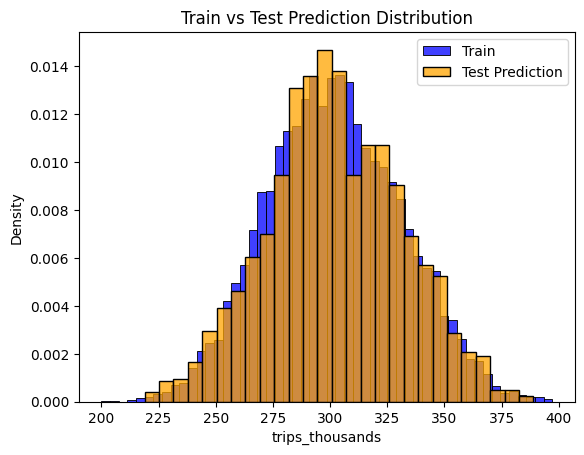

In [59]:
import seaborn as sns
sns.histplot(df_train['trips_thousands'], label='Train', color='blue', stat='density')
sns.histplot(y_test_pred, label='Test Prediction', color='orange', stat='density')
plt.legend()
plt.title("Train vs Test Prediction Distribution")
plt.show()


# Feature Engineering

In [60]:
# Asumsi: df_all sudah mengandung 'date' sebagai datetime
df_all['day_of_week'] = df_all['date'].dt.dayofweek
df_all['is_weekend'] = (df_all['day_of_week'] >= 5).astype(int)
df_all['month'] = df_all['date'].dt.month
df_all['week_of_year'] = df_all['date'].dt.isocalendar().week.astype(int)

In [61]:
# Pisahkan kembali setelah menambah fitur baru
df_train = df_all[df_all['is_train'] == 1].copy()
df_test = df_all[df_all['is_train'] == 0].copy()


In [62]:
# Ambil semua kolom numerik (termasuk fitur baru dan trips_thousands)
numeric_cols = df_train.select_dtypes(include=['number']).columns

# Hitung korelasi ke target
corr_to_target = df_train[numeric_cols].corr()['trips_thousands'].sort_values(ascending=False)

# Tampilkan hasil
print("🔍 Korelasi fitur terhadap trips_thousands:")
print(corr_to_target)


🔍 Korelasi fitur terhadap trips_thousands:
trips_thousands    1.000000
month              0.010248
week_of_year       0.009719
is_weekend         0.007690
day_of_week        0.004295
is_train                NaN
Name: trips_thousands, dtype: float64


In [63]:
drop_cols = ['zone_id', 'zone_mean', 'date', 'is_train', 'trips_thousands'] 
fitur_dipakai = [col for col in df_train.columns if col not in drop_cols]

X = df_train[fitur_dipakai]
y = df_train['trips_thousands']

In [64]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# === LOG TRANSFORM TARGET ===
y_train_log = np.log1p(y_train)  # log(1 + y)
y_val_log = np.log1p(y_val)      # jika kamu juga ingin evaluasi log-RMSE (opsional)

# === MODEL DENGAN PARAMETER TERBAIK ===
best_xgb = XGBRegressor(
    colsample_bytree=0.83175,
    gamma=0.0015,
    learning_rate=0.0421,
    max_depth=4,
    min_child_weight=2,
    n_estimators=921,
    subsample=0.7242,
    random_state=42,
    verbosity=0
)

# === TRAIN MODEL DENGAN y_log ===
best_xgb.fit(X_train, y_train_log)

# === PREDIKSI DI VALIDATION ===
log_preds = best_xgb.predict(X_val)

# === KEMBALIKAN SKALA ===
final_preds = np.expm1(log_preds)  # inverse dari log1p

# === EVALUASI RMSE ===
final_rmse = np.sqrt(mean_squared_error(y_val, final_preds))
print(f"📉 RMSE Final setelah Log Transform dan Best Params: {final_rmse:.4f}")


📉 RMSE Final setelah Log Transform dan Best Params: 3.2744


In [65]:
errors = y_val - final_preds
largest_errors = df_train.loc[y_val.index].assign(
    true=y_val, pred=final_preds, error=errors
).sort_values(by='error', ascending=False).head(10)
print(largest_errors[['zone_id', 'date', 'true', 'pred', 'error']])


     zone_id       date        true        pred      error
7023    Z034 2025-03-09  330.484417  319.979889  10.504528
6308    Z065 2025-01-16  336.733170  326.725922  10.007248
1369    Z191 2025-01-15  323.845859  314.066071   9.779788
8134    Z119 2025-03-29  323.966735  314.248352   9.718383
7464    Z079 2025-01-09  290.680923  281.024231   9.656692
483     Z066 2025-02-23  315.374343  305.878479   9.495864
3834    Z191 2025-03-17  330.692149  321.261230   9.430919
4344    Z065 2025-02-14  317.894156  308.527466   9.366690
5731    Z119 2025-01-20  319.743627  310.459290   9.284337
9334    Z109 2025-01-27  296.811452  287.552185   9.259267


In [66]:
import catboost as cb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# =======================================================
# LANGKAH 1: PERSIAPAN DATA (TRANSFORMASI LOG)
# =======================================================
# Seperti sebelumnya, kita gunakan log transform pada y_train
y_train_log = np.log1p(y_train)

print("Data siap, memulai pelatihan model...")
print("-" * 40)

# =======================================================
# LANGKAH 2: MELATIH MODEL CATBOOST
# =======================================================
print("Melatih CatBoost Regressor...")

# Inisialisasi model CatBoost dengan beberapa parameter dasar
# verbose=0 agar tidak menampilkan output training yang panjang
cat_model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=7,
    verbose=0,
    random_state=42
)

# Latih model
cat_model.fit(X_train, y_train_log)

# Prediksi dan kembalikan ke skala semula
cat_preds_log = cat_model.predict(X_val)
cat_preds = np.expm1(cat_preds_log)

# Hitung RMSE
rmse_catboost = np.sqrt(mean_squared_error(y_val, cat_preds))
print(f"✅ RMSE CatBoost: {rmse_catboost:.4f}")
print("-" * 40)


# =======================================================
# LANGKAH 3: MELATIH MODEL LIGHTGBM
# =======================================================
print("Melatih LightGBM Regressor...")

# Inisialisasi model LightGBM dengan beberapa parameter dasar
lgbm_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1 # Gunakan semua core CPU
)

# Latih model
lgbm_model.fit(X_train, y_train_log)

# Prediksi dan kembalikan ke skala semula
lgbm_preds_log = lgbm_model.predict(X_val)
lgbm_preds = np.expm1(lgbm_preds_log)

# Hitung RMSE
rmse_lightgbm = np.sqrt(mean_squared_error(y_val, lgbm_preds))
print(f"✅ RMSE LightGBM: {rmse_lightgbm:.4f}")
print("-" * 40)


# =======================================================
# LANGKAH 4: KESIMPULAN PERBANDINGAN
# =======================================================
print("Perbandingan Selesai:")
if rmse_catboost < rmse_lightgbm:
    print(f"🏆 CatBoost sedikit lebih unggul dengan RMSE {rmse_catboost:.4f}.")
elif rmse_lightgbm < rmse_catboost:
    print(f"🏆 LightGBM sedikit lebih unggul dengan RMSE {rmse_lightgbm:.4f}.")
else:
    print("Performa kedua model hampir identik.")

Data siap, memulai pelatihan model...
----------------------------------------
Melatih CatBoost Regressor...
✅ RMSE CatBoost: 2.9491
----------------------------------------
Melatih LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] Start training from score 5.708554
✅ RMSE LightGBM: 3.2501
----------------------------------------
Perbandingan Selesai:
🏆 CatBoost sedikit lebih unggul dengan RMSE 2.9491.


In [67]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Pastikan log transform target
y_train_log = np.log1p(y_train)

# CatBoostRegressor dasar
cat = CatBoostRegressor(
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

# Parameter space
param_dist = {
    'iterations': randint(300, 1500),
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.2),
    'l2_leaf_reg': uniform(1, 9),
    'bagging_temperature': uniform(0, 1),
    'border_count': randint(32, 255)
}

# Randomized Search
random_search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=50,  # tingkatkan ke 100 jika waktu cukup
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit dengan data training
random_search_cat.fit(X_train, y_train_log)

# Hasil terbaik
print("✅ Best CatBoost Params:", random_search_cat.best_params_)
print("✅ Best CV RMSE:", -random_search_cat.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ Best CatBoost Params: {'bagging_temperature': np.float64(0.21876421957307024), 'border_count': 247, 'depth': 4, 'iterations': 1436, 'l2_leaf_reg': np.float64(1.5840302239808342), 'learning_rate': np.float64(0.06078308278686894)}
✅ Best CV RMSE: 0.00981794855533287


In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Training ulang dengan parameter terbaik
best_cat_model = CatBoostRegressor(
    **random_search_cat.best_params_,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)
best_cat_model.fit(X_train, y_train_log)

# Prediksi di validation set
val_preds_log = best_cat_model.predict(X_val)
val_preds = np.expm1(val_preds_log)  # balik ke skala asli

# Hitung RMSE final di skala asli
final_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print("📉 Final RMSE CatBoost (skala asli):", final_rmse)


📉 Final RMSE CatBoost (skala asli): 2.9156328857522213


C:\Users\User\AppData\Local\Temp\ipykernel_13712\120559042.py:46: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


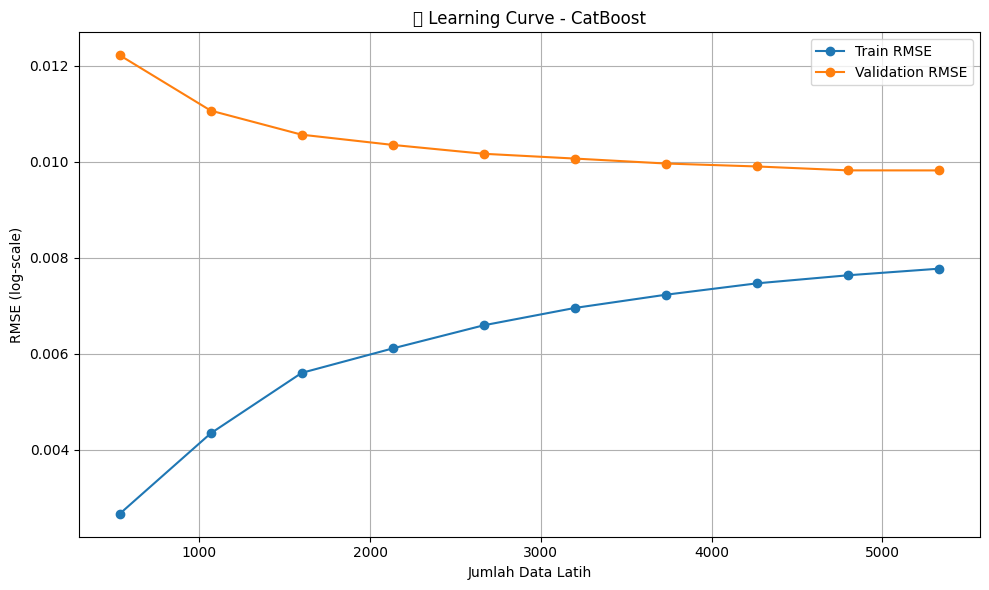

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
from catboost import CatBoostRegressor

# Fungsi custom RMSE (karena sklearn pakai scoring "neg_root_mean_squared_error")
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scorer untuk learning_curve
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Model dengan best params
cat_model = CatBoostRegressor(
    **random_search_cat.best_params_,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

# Gunakan log target
train_sizes, train_scores, val_scores = learning_curve(
    estimator=cat_model,
    X=X_train,
    y=y_train_log,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    scoring=rmse_scorer,
    n_jobs=-1
)

# Ubah jadi positif karena skor RMSE kita negatif dari make_scorer
train_rmse = -np.mean(train_scores, axis=1)
val_rmse = -np.mean(val_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_rmse, label='Train RMSE', marker='o')
plt.plot(train_sizes, val_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('RMSE (log-scale)')
plt.title('📈 Learning Curve - CatBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
# Prediksi log(trips) lalu transform ke skala asli
log_preds_test = best_cat_model.predict(X_test)
preds_test = np.expm1(log_preds_test)


In [76]:
# Load file submission format
submission_base = pd.read_csv('mobility_test.csv')

# Pastikan urutan ID sesuai
submission = submission_base[['ID']].copy()
submission['trips_thousands'] = preds_test

# Pastikan tidak ada nilai negatif
submission['trips_thousands'] = submission['trips_thousands'].clip(lower=0)

In [77]:
submission.to_csv("submission_catboost_final.csv", index=False)
print("✅ Submission berhasil disimpan!")


✅ Submission berhasil disimpan!


In [1]:
final_preds = (xgb_first + best_cat_model) / 2

NameError: name 'xgb_first' is not defined